In [ ]:
!pip install numpy==1.26.4 --use-deprecated=legacy-resolver


In [ ]:
!pip install mediapipe


In [ ]:
import mediapipe as mp
import cv2
import numpy as np
import pandas as pd
import os
from tqdm import tqdm


/usr/local/lib/python3.11/dist-packages/jaxlib/plugin_support.py:71: RuntimeWarning: JAX plugin jax_cuda12_plugin version 0.5.1 is installed, but it is not compatible with the installed jaxlib version 0.6.0, so it will not be used.
  warnings.warn(


In [ ]:
!mkdir señas

In [ ]:
%cd señas
!unzip dataset_combinado.zip

!rm -rf /content/señas/dataset_combinado.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset_combinado/train/p/dataset2_Per06_Per06_P_1.jpg  
  inflating: dataset_combinado/train/p/dataset2_Per04_Per04_P_3.jpg  
  inflating: dataset_combinado/train/p/dataset2_Per11_Per11_P_2.jpg  
  inflating: dataset_combinado/train/p/dataset2_Per64_Per64_P_4.jpg  
  inflating: dataset_combinado/train/p/dataset2_Per01_Per01_P_1.jpg  
  inflating: dataset_combinado/train/p/dataset2_Per08_Per08_P_4.jpg  
  inflating: dataset_combinado/train/p/dataset2_Per65_Per65_P_3.jpg  
  inflating: dataset_combinado/train/p/dataset2_Per65_Per65_P_5.jpg  
  inflating: dataset_combinado/train/p/dataset2_Per50_Per50_P_0.jpg  
  inflating: dataset_combinado/train/p/dataset2_Per68_Per68_P_2.jpg  
  inflating: dataset_combinado/train/p/dataset2_Per26_Per26_P_0.jpg  
  inflating: dataset_combinado/train/p/dataset2_Per12_Per12_P_3.jpg  
  inflating: dataset_combinado/train/p/dataset2_Per22_Per22_P_0.jpg  
  inflating: dataset_combinado/train/p/

In [ ]:
!ls /content/señas/dataset_combinado/a | wc -l
!ls /content/señas/dataset_combinado/b | wc -l
!ls /content/señas/dataset_combinado/c | wc -l
!ls /content/señas/dataset_combinado/d | wc -l
!ls /content/señas/dataset_combinado/e | wc -l
!ls /content/señas/dataset_combinado/f | wc -l
!ls /content/señas/dataset_combinado/i | wc -l
!ls /content/señas/dataset_combinado/k | wc -l
!ls /content/señas/dataset_combinado/l | wc -l
!ls /content/señas/dataset_combinado/m | wc -l
!ls /content/señas/dataset_combinado/n | wc -l
!ls /content/señas/dataset_combinado/o | wc -l
!ls /content/señas/dataset_combinado/p | wc -l
!ls /content/señas/dataset_combinado/q | wc -l
!ls /content/señas/dataset_combinado/r | wc -l
!ls /content/señas/dataset_combinado/t | wc -l
!ls /content/señas/dataset_combinado/u | wc -l
!ls /content/señas/dataset_combinado/v | wc -l
!ls /content/señas/dataset_combinado/w | wc -l
!ls /content/señas/dataset_combinado/x | wc -l
!ls /content/señas/dataset_combinado/y | wc -l
!ls /content/señas/dataset_combinado/train | wc -l
!ls /content/señas/dataset_combinado/test | wc -l
!ls /content/señas/dataset_combinado/val | wc -l

469
469
469
469
469
469
469
469
469
469
469
469
469
469
469
469
469
469
469
469
469
21
21
21


In [ ]:
!rm -rf /content/señas/dataset_combinado/train
!rm -rf /content/señas/dataset_combinado/test
!rm -rf /content/señas/dataset_combinado/val

In [ ]:
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=1)
mp_drawing = mp.solutions.drawing_utils

def extraer_landmarks_imagen(img_path):
    img = cv2.imread(img_path)
    if img is None:
        return None  # imagen inválida

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    resultados = hands.process(img_rgb)

    if resultados.multi_hand_landmarks:
        puntos = []
        for lm in resultados.multi_hand_landmarks[0].landmark:
            puntos.extend([lm.x, lm.y, lm.z])
        return puntos
    else:
        return None  # no se detectó mano


In [ ]:
data = []
labels = []
dataset_path = '/content/señas/dataset_combinado'

for clase in sorted(os.listdir(dataset_path)):
    clase_path = os.path.join(dataset_path, clase)
    if not os.path.isdir(clase_path):
        continue

    for img_file in tqdm(os.listdir(clase_path), desc=f"Procesando {clase}"):
        img_path = os.path.join(clase_path, img_file)
        puntos = extraer_landmarks_imagen(img_path)

        if puntos:
            data.append(puntos)
            labels.append(clase)

# Convertir a DataFrame
df = pd.DataFrame(data)
df['label'] = labels

# Guardar como CSV
df.to_csv('landmarks_dataset.csv', index=False)
print("✅ CSV generado: landmarks_dataset.csv")


Procesando y: 100%|██████████| 469/469 [00:19<00:00, 24.40it/s]


✅ CSV generado: landmarks_dataset.csv


In [ ]:
import pandas as pd

df = pd.read_csv('/content/landmarks_dataset.csv')  # ajusta el nombre si es distinto
print(df.shape)
df.head()


(9679, 64)


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,label
0,0.225545,0.606985,-6.817873e-08,0.234872,0.583519,-0.001076,0.238251,0.559843,-0.002742,0.243472,...,0.195831,0.548912,-0.012099,0.201881,0.558622,-0.007659,0.203073,0.564248,-0.003841,a
1,0.347988,0.383009,-1.677389e-07,0.369384,0.361091,0.000375,0.381257,0.336064,0.000269,0.385403,...,0.330057,0.301988,-0.012535,0.334694,0.314564,-0.008437,0.334767,0.325565,-0.004425,a
2,0.412965,0.450777,-1.291500e-07,0.433124,0.432985,-0.000270,0.444148,0.409879,0.000076,0.450870,...,0.406166,0.385964,-0.007658,0.407614,0.398680,-0.004862,0.407666,0.408573,-0.001231,a
3,0.415734,0.457535,-8.929874e-08,0.433970,0.442848,-0.000278,0.444822,0.418671,0.000529,0.452218,...,0.410163,0.384288,-0.004608,0.411527,0.393921,-0.002498,0.411137,0.404852,0.000325,a
4,0.662201,0.624536,4.605511e-08,0.635789,0.621540,0.004113,0.615120,0.635030,0.002918,0.604141,...,0.630705,0.707920,-0.024326,0.622116,0.722350,-0.024878,0.614052,0.732271,-0.025023,a


In [ ]:
print(df.columns)


Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', 'label'],
      dtype='object')


In [ ]:
# Separar los datos (X) y las etiquetas (y)
X = df.drop('label', axis=1).values
y = df['label'].values

# Codificar las letras en números (A=0, B=1, ...)
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_cat = to_categorical(y_encoded)

# Guardamos el codificador por si lo necesitamos luego
import pickle
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Definir el modelo
model = Sequential([
    Dense(128, activation='relu', input_shape=(X.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(y_cat.shape[1], activation='softmax')
])

# Compilar
model.compile(optimizer=Adam(learning_rate=0.0007),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

checkpoint = ModelCheckpoint(
    filepath='mejor_modelo.h5',   # Aquí guarda el mejor modelo
    monitor='val_accuracy',       # Basado en la mejor precisión de validación
    save_best_only=True,
    mode='max',
    verbose=1
)

# Entrenamiento
history = model.fit(
    X_train, y_train,
    epochs=250,
    validation_data=(X_test, y_test),
    callbacks=[early_stop, checkpoint]
)


Epoch 1/250
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0499 - loss: 3.0565
Epoch 1: val_accuracy improved from -inf to 0.05424, saving model to mejor_modelo.h5


242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0500 - loss: 3.0565 - val_accuracy: 0.0542 - val_loss: 3.0245
Epoch 2/250
223/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0785 - loss: 3.0225
Epoch 2: val_accuracy improved from 0.05424 to 0.08988, saving model to mejor_modelo.h5


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0786 - loss: 3.0220 - val_accuracy: 0.0899 - val_loss: 2.9928
Epoch 3/250
219/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0849 - loss: 2.9904
Epoch 3: val_accuracy improved from 0.08988 to 0.12810, saving model to mejor_modelo.h5


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0857 - loss: 2.9892 - val_accuracy: 0.1281 - val_loss: 2.9356
Epoch 4/250
217/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1284 - loss: 2.9259
Epoch 4: val_accuracy improved from 0.12810 to 0.21746, saving model to mejor_modelo.h5


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1294 - loss: 2.9232 - val_accuracy: 0.2175 - val_loss: 2.8058
Epoch 5/250
218/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1588 - loss: 2.8026
Epoch 5: val_accuracy improved from 0.21746 to 0.29339, saving model to mejor_modelo.h5


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1592 - loss: 2.7999 - val_accuracy: 0.2934 - val_loss: 2.6514
Epoch 6/250
241/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2019 - loss: 2.6741
Epoch 6: val_accuracy improved from 0.29339 to 0.36570, saving model to mejor_modelo.h5


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2019 - loss: 2.6739 - val_accuracy: 0.3657 - val_loss: 2.5137
Epoch 7/250
236/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2355 - loss: 2.5578
Epoch 7: val_accuracy improved from 0.36570 to 0.38481, saving model to mejor_modelo.h5


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2357 - loss: 2.5570 - val_accuracy: 0.3848 - val_loss: 2.3616
Epoch 8/250
233/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2703 - loss: 2.4259
Epoch 8: val_accuracy improved from 0.38481 to 0.39205, saving model to mejor_modelo.h5


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2707 - loss: 2.4243 - val_accuracy: 0.3920 - val_loss: 2.2397
Epoch 9/250
240/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2892 - loss: 2.3144
Epoch 9: val_accuracy improved from 0.39205 to 0.46023, saving model to mejor_modelo.h5


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2894 - loss: 2.3139 - val_accuracy: 0.4602 - val_loss: 2.0706
Epoch 10/250
216/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3517 - loss: 2.1738
Epoch 10: val_accuracy improved from 0.46023 to 0.51033, saving model to mejor_modelo.h5


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3517 - loss: 2.1731 - val_accuracy: 0.5103 - val_loss: 1.9679
Epoch 11/250
219/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3624 - loss: 2.1182
Epoch 11: val_accuracy improved from 0.51033 to 0.51188, saving model to mejor_modelo.h5


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3629 - loss: 2.1150 - val_accuracy: 0.5119 - val_loss: 1.8838
Epoch 12/250
220/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3886 - loss: 2.0163
Epoch 12: val_accuracy did not improve from 0.51188
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3884 - loss: 2.0160 - val_accuracy: 0.4892 - val_loss: 1.8333
Epoch 13/250
218/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4013 - loss: 1.9720
Epoch 13: val_accuracy improved from 0.51188 to 0.52996, saving model to mejor_modelo.h5


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4018 - loss: 1.9691 - val_accuracy: 0.5300 - val_loss: 1.7716
Epoch 14/250
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4081 - loss: 1.8968
Epoch 14: val_accuracy did not improve from 0.52996
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4082 - loss: 1.8968 - val_accuracy: 0.5258 - val_loss: 1.7154
Epoch 15/250
219/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4291 - loss: 1.8495
Epoch 15: val_accuracy improved from 0.52996 to 0.53977, saving model to mejor_modelo.h5


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4288 - loss: 1.8506 - val_accuracy: 0.5398 - val_loss: 1.6731
Epoch 16/250
216/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4364 - loss: 1.8308
Epoch 16: val_accuracy did not improve from 0.53977
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4363 - loss: 1.8283 - val_accuracy: 0.5336 - val_loss: 1.6629
Epoch 17/250
217/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4410 - loss: 1.7783
Epoch 17: val_accuracy did not improve from 0.53977
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4411 - loss: 1.7790 - val_accuracy: 0.5263 - val_loss: 1.6534
Epoch 18/250
217/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4380 - loss: 1.7881
Epoch 18: val_accuracy did not improve from 0.53977
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4394 - loss: 1.7850 - val_accuracy: 0.5289 - val_loss: 1.6019
Epoch 19/250
240/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4584 - loss: 1.7204
Epoch 19: val_accuracy d

242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4532 - loss: 1.7080 - val_accuracy: 0.5532 - val_loss: 1.5271
Epoch 21/250
221/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4661 - loss: 1.6846
Epoch 21: val_accuracy improved from 0.55320 to 0.56250, saving model to mejor_modelo.h5


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4663 - loss: 1.6835 - val_accuracy: 0.5625 - val_loss: 1.5134
Epoch 22/250
217/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4789 - loss: 1.6544
Epoch 22: val_accuracy did not improve from 0.56250
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4786 - loss: 1.6541 - val_accuracy: 0.5553 - val_loss: 1.5125
Epoch 23/250
217/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4850 - loss: 1.6373
Epoch 23: val_accuracy improved from 0.56250 to 0.56457, saving model to mejor_modelo.h5


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4850 - loss: 1.6363 - val_accuracy: 0.5646 - val_loss: 1.4624
Epoch 24/250
216/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4868 - loss: 1.6150
Epoch 24: val_accuracy improved from 0.56457 to 0.57386, saving model to mejor_modelo.h5


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4869 - loss: 1.6144 - val_accuracy: 0.5739 - val_loss: 1.4483
Epoch 25/250
234/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4938 - loss: 1.5746
Epoch 25: val_accuracy did not improve from 0.57386
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4936 - loss: 1.5754 - val_accuracy: 0.5728 - val_loss: 1.4564
Epoch 26/250
238/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4943 - loss: 1.5892
Epoch 26: val_accuracy improved from 0.57386 to 0.58574, saving model to mejor_modelo.h5


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4943 - loss: 1.5891 - val_accuracy: 0.5857 - val_loss: 1.4244
Epoch 27/250
236/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5102 - loss: 1.5467
Epoch 27: val_accuracy did not improve from 0.58574
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5099 - loss: 1.5471 - val_accuracy: 0.5713 - val_loss: 1.4137
Epoch 28/250
217/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5056 - loss: 1.5392
Epoch 28: val_accuracy did not improve from 0.58574
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5056 - loss: 1.5392 - val_accuracy: 0.5759 - val_loss: 1.4055
Epoch 29/250
216/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5184 - loss: 1.5079
Epoch 29: val_accuracy did not improve from 0.58574
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5174 - loss: 1.5105 - val_accuracy: 0.5558 - val_loss: 1.4221
Epoch 30/250
217/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5099 - loss: 1.5302
Epoch 30: val_accuracy d

242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5179 - loss: 1.4961 - val_accuracy: 0.6116 - val_loss: 1.3624
Epoch 32/250
216/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5234 - loss: 1.4790
Epoch 32: val_accuracy did not improve from 0.61157
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5220 - loss: 1.4819 - val_accuracy: 0.5997 - val_loss: 1.3742
Epoch 33/250
219/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5280 - loss: 1.4729
Epoch 33: val_accuracy did not improve from 0.61157
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5277 - loss: 1.4744 - val_accuracy: 0.6033 - val_loss: 1.3571
Epoch 34/250
237/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5167 - loss: 1.4996
Epoch 34: val_accuracy did not improve from 0.61157
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5169 - loss: 1.4992 - val_accuracy: 0.6007 - val_loss: 1.3424
Epoch 35/250
218/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5356 - loss: 1.4566
Epoch 35: val_accuracy d

242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5279 - loss: 1.4625 - val_accuracy: 0.6136 - val_loss: 1.3211
Epoch 39/250
239/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5435 - loss: 1.4044
Epoch 39: val_accuracy did not improve from 0.61364
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5434 - loss: 1.4049 - val_accuracy: 0.6116 - val_loss: 1.3263
Epoch 40/250
218/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5451 - loss: 1.4227
Epoch 40: val_accuracy did not improve from 0.61364
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5448 - loss: 1.4235 - val_accuracy: 0.6100 - val_loss: 1.3076
Epoch 41/250
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5490 - loss: 1.4395
Epoch 41: val_accuracy did not improve from 0.61364
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5490 - loss: 1.4395 - val_accuracy: 0.6090 - val_loss: 1.2893
Epoch 42/250
238/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5542 - loss: 1.4142
Epoch 42: val_accuracy d

242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5481 - loss: 1.4284 - val_accuracy: 0.6142 - val_loss: 1.2904
Epoch 44/250
228/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5485 - loss: 1.4080
Epoch 44: val_accuracy did not improve from 0.61415
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5487 - loss: 1.4079 - val_accuracy: 0.6111 - val_loss: 1.2922
Epoch 45/250
225/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5511 - loss: 1.4075
Epoch 45: val_accuracy improved from 0.61415 to 0.62087, saving model to mejor_modelo.h5


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5516 - loss: 1.4069 - val_accuracy: 0.6209 - val_loss: 1.2702
Epoch 46/250
240/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5673 - loss: 1.3784
Epoch 46: val_accuracy did not improve from 0.62087
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5672 - loss: 1.3785 - val_accuracy: 0.6183 - val_loss: 1.2820
Epoch 47/250
233/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5652 - loss: 1.3653
Epoch 47: val_accuracy improved from 0.62087 to 0.63275, saving model to mejor_modelo.h5


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5654 - loss: 1.3652 - val_accuracy: 0.6327 - val_loss: 1.2686
Epoch 48/250
234/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5597 - loss: 1.3651
Epoch 48: val_accuracy did not improve from 0.63275
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5597 - loss: 1.3651 - val_accuracy: 0.6271 - val_loss: 1.2505
Epoch 49/250
217/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5644 - loss: 1.3727
Epoch 49: val_accuracy improved from 0.63275 to 0.63636, saving model to mejor_modelo.h5


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5646 - loss: 1.3707 - val_accuracy: 0.6364 - val_loss: 1.2396
Epoch 50/250
238/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5614 - loss: 1.3551
Epoch 50: val_accuracy did not improve from 0.63636
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5615 - loss: 1.3551 - val_accuracy: 0.6364 - val_loss: 1.2347
Epoch 51/250
232/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5786 - loss: 1.3373
Epoch 51: val_accuracy improved from 0.63636 to 0.64050, saving model to mejor_modelo.h5


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5783 - loss: 1.3381 - val_accuracy: 0.6405 - val_loss: 1.2343
Epoch 52/250
215/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5610 - loss: 1.3524
Epoch 52: val_accuracy did not improve from 0.64050
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5618 - loss: 1.3526 - val_accuracy: 0.6250 - val_loss: 1.2577
Epoch 53/250
241/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5654 - loss: 1.3786
Epoch 53: val_accuracy did not improve from 0.64050
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5655 - loss: 1.3783 - val_accuracy: 0.6338 - val_loss: 1.2325
Epoch 54/250
217/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5776 - loss: 1.3193
Epoch 54: val_accuracy did not improve from 0.64050
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5778 - loss: 1.3199 - val_accuracy: 0.6312 - val_loss: 1.2246
Epoch 55/250
219/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5763 - loss: 1.3421
Epoch 55: val_accuracy i

242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5764 - loss: 1.3408 - val_accuracy: 0.6410 - val_loss: 1.2231
Epoch 56/250
219/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5942 - loss: 1.2980
Epoch 56: val_accuracy improved from 0.64101 to 0.64979, saving model to mejor_modelo.h5


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5937 - loss: 1.2996 - val_accuracy: 0.6498 - val_loss: 1.2077
Epoch 57/250
217/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5862 - loss: 1.3089
Epoch 57: val_accuracy did not improve from 0.64979
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5860 - loss: 1.3095 - val_accuracy: 0.6317 - val_loss: 1.2376
Epoch 58/250
216/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5819 - loss: 1.3116
Epoch 58: val_accuracy did not improve from 0.64979
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5812 - loss: 1.3128 - val_accuracy: 0.6467 - val_loss: 1.2251
Epoch 59/250
241/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5872 - loss: 1.2882
Epoch 59: val_accuracy improved from 0.64979 to 0.65186, saving model to mejor_modelo.h5


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5872 - loss: 1.2882 - val_accuracy: 0.6519 - val_loss: 1.2019
Epoch 60/250
217/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5853 - loss: 1.2983
Epoch 60: val_accuracy did not improve from 0.65186
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5849 - loss: 1.3006 - val_accuracy: 0.6462 - val_loss: 1.2039
Epoch 61/250
234/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5888 - loss: 1.2964
Epoch 61: val_accuracy did not improve from 0.65186
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5889 - loss: 1.2964 - val_accuracy: 0.6508 - val_loss: 1.1948
Epoch 62/250
216/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5852 - loss: 1.3084
Epoch 62: val_accuracy did not improve from 0.65186
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5858 - loss: 1.3063 - val_accuracy: 0.6333 - val_loss: 1.2174
Epoch 63/250
234/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6051 - loss: 1.2584
Epoch 63: val_accuracy d

242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5934 - loss: 1.2618 - val_accuracy: 0.6555 - val_loss: 1.1785
Epoch 68/250
218/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6041 - loss: 1.2537
Epoch 68: val_accuracy did not improve from 0.65548
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6038 - loss: 1.2562 - val_accuracy: 0.6503 - val_loss: 1.1844
Epoch 69/250
216/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6037 - loss: 1.2603
Epoch 69: val_accuracy did not improve from 0.65548
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6035 - loss: 1.2615 - val_accuracy: 0.6503 - val_loss: 1.1854
Epoch 70/250
218/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6011 - loss: 1.2638
Epoch 70: val_accuracy did not improve from 0.65548
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6018 - loss: 1.2630 - val_accuracy: 0.6436 - val_loss: 1.1881
Epoch 71/250
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6212 - loss: 1.2370
Epoch 71: val_accuracy i

242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6212 - loss: 1.2371 - val_accuracy: 0.6606 - val_loss: 1.1666
Epoch 72/250
220/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6046 - loss: 1.2594
Epoch 72: val_accuracy did not improve from 0.66064
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6048 - loss: 1.2586 - val_accuracy: 0.6322 - val_loss: 1.2062
Epoch 73/250
216/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6170 - loss: 1.2272
Epoch 73: val_accuracy did not improve from 0.66064
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6162 - loss: 1.2298 - val_accuracy: 0.6415 - val_loss: 1.1930
Epoch 74/250
238/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6124 - loss: 1.2400
Epoch 74: val_accuracy did not improve from 0.66064
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6123 - loss: 1.2403 - val_accuracy: 0.6570 - val_loss: 1.1573
Epoch 75/250
218/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6071 - loss: 1.2542
Epoch 75: val_accuracy d

242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6089 - loss: 1.2492 - val_accuracy: 0.6632 - val_loss: 1.1538
Epoch 78/250
217/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6130 - loss: 1.2401
Epoch 78: val_accuracy did not improve from 0.66322
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6128 - loss: 1.2406 - val_accuracy: 0.6632 - val_loss: 1.1436
Epoch 79/250
239/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6164 - loss: 1.2395
Epoch 79: val_accuracy improved from 0.66322 to 0.66787, saving model to mejor_modelo.h5


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6163 - loss: 1.2395 - val_accuracy: 0.6679 - val_loss: 1.1344
Epoch 80/250
239/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6124 - loss: 1.2272
Epoch 80: val_accuracy did not improve from 0.66787
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6124 - loss: 1.2272 - val_accuracy: 0.6400 - val_loss: 1.1897
Epoch 81/250
241/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6123 - loss: 1.2321
Epoch 81: val_accuracy did not improve from 0.66787
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6123 - loss: 1.2322 - val_accuracy: 0.6622 - val_loss: 1.1541
Epoch 82/250
239/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6184 - loss: 1.2270
Epoch 82: val_accuracy did not improve from 0.66787
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6184 - loss: 1.2269 - val_accuracy: 0.6627 - val_loss: 1.1450
Epoch 83/250
219/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6204 - loss: 1.2015
Epoch 83: val_accuracy d

242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6164 - loss: 1.2257 - val_accuracy: 0.6684 - val_loss: 1.1379
Epoch 86/250
241/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6260 - loss: 1.2085
Epoch 86: val_accuracy did not improve from 0.66839
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6259 - loss: 1.2086 - val_accuracy: 0.6591 - val_loss: 1.1398
Epoch 87/250
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6171 - loss: 1.2200
Epoch 87: val_accuracy did not improve from 0.66839
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6171 - loss: 1.2200 - val_accuracy: 0.6684 - val_loss: 1.1346
Epoch 88/250
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6158 - loss: 1.2339
Epoch 88: val_accuracy improved from 0.66839 to 0.67252, saving model to mejor_modelo.h5


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6158 - loss: 1.2338 - val_accuracy: 0.6725 - val_loss: 1.1247
Epoch 89/250
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6315 - loss: 1.2049
Epoch 89: val_accuracy did not improve from 0.67252
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6315 - loss: 1.2049 - val_accuracy: 0.6565 - val_loss: 1.1524
Epoch 90/250
222/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6296 - loss: 1.1973
Epoch 90: val_accuracy did not improve from 0.67252
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6291 - loss: 1.1984 - val_accuracy: 0.6658 - val_loss: 1.1325
Epoch 91/250
228/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6194 - loss: 1.1927
Epoch 91: val_accuracy did not improve from 0.67252
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6197 - loss: 1.1936 - val_accuracy: 0.6679 - val_loss: 1.1315
Epoch 92/250
219/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6270 - loss: 1.1988
Epoch 92: val_accuracy d

242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6387 - loss: 1.1752 - val_accuracy: 0.6751 - val_loss: 1.1146
Epoch 101/250
241/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6361 - loss: 1.1645
Epoch 101: val_accuracy did not improve from 0.67510
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6361 - loss: 1.1648 - val_accuracy: 0.6560 - val_loss: 1.1365
Epoch 102/250
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6377 - loss: 1.1770
Epoch 102: val_accuracy improved from 0.67510 to 0.67562, saving model to mejor_modelo.h5


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6376 - loss: 1.1771 - val_accuracy: 0.6756 - val_loss: 1.1158
Epoch 103/250
218/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6335 - loss: 1.1810
Epoch 103: val_accuracy did not improve from 0.67562
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6331 - loss: 1.1803 - val_accuracy: 0.6663 - val_loss: 1.1080
Epoch 104/250
216/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6276 - loss: 1.1749
Epoch 104: val_accuracy did not improve from 0.67562
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6273 - loss: 1.1765 - val_accuracy: 0.6715 - val_loss: 1.1110
Epoch 105/250
219/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6222 - loss: 1.1942
Epoch 105: val_accuracy did not improve from 0.67562
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6226 - loss: 1.1932 - val_accuracy: 0.6730 - val_loss: 1.1036
Epoch 106/250
216/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6330 - loss: 1.1617
Epoch 106: val_ac

242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6380 - loss: 1.1592 - val_accuracy: 0.6798 - val_loss: 1.1026
Epoch 109/250
215/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6443 - loss: 1.1413
Epoch 109: val_accuracy did not improve from 0.67975
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6434 - loss: 1.1438 - val_accuracy: 0.6782 - val_loss: 1.0999
Epoch 110/250
219/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6406 - loss: 1.1401
Epoch 110: val_accuracy did not improve from 0.67975
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6395 - loss: 1.1438 - val_accuracy: 0.6761 - val_loss: 1.1015
Epoch 111/250
221/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6262 - loss: 1.1901
Epoch 111: val_accuracy did not improve from 0.67975
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6270 - loss: 1.1880 - val_accuracy: 0.6782 - val_loss: 1.0912
Epoch 112/250
219/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6354 - loss: 1.1698
Epoch 112: val_ac

242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6305 - loss: 1.1962 - val_accuracy: 0.6803 - val_loss: 1.0950
Epoch 115/250
217/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6381 - loss: 1.1624
Epoch 115: val_accuracy did not improve from 0.68027
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6390 - loss: 1.1611 - val_accuracy: 0.6617 - val_loss: 1.1351
Epoch 116/250
239/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6477 - loss: 1.1616
Epoch 116: val_accuracy did not improve from 0.68027
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6476 - loss: 1.1615 - val_accuracy: 0.6612 - val_loss: 1.1203
Epoch 117/250
241/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6324 - loss: 1.1696
Epoch 117: val_accuracy improved from 0.68027 to 0.68337, saving model to mejor_modelo.h5


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6324 - loss: 1.1696 - val_accuracy: 0.6834 - val_loss: 1.0909
Epoch 118/250
237/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6439 - loss: 1.1397
Epoch 118: val_accuracy did not improve from 0.68337
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6440 - loss: 1.1396 - val_accuracy: 0.6787 - val_loss: 1.0939
Epoch 119/250
236/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6363 - loss: 1.1738
Epoch 119: val_accuracy did not improve from 0.68337
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6365 - loss: 1.1732 - val_accuracy: 0.6829 - val_loss: 1.0930
Epoch 120/250
216/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6404 - loss: 1.1600
Epoch 120: val_accuracy did not improve from 0.68337
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6403 - loss: 1.1585 - val_accuracy: 0.6818 - val_loss: 1.0969
Epoch 121/250
240/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6438 - loss: 1.1540
Epoch 121: val_ac

242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6409 - loss: 1.1384 - val_accuracy: 0.6947 - val_loss: 1.0770
Epoch 125/250
217/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6407 - loss: 1.1417
Epoch 125: val_accuracy did not improve from 0.69473
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6404 - loss: 1.1431 - val_accuracy: 0.6860 - val_loss: 1.0836
Epoch 126/250
239/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6515 - loss: 1.1157
Epoch 126: val_accuracy did not improve from 0.69473
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6515 - loss: 1.1160 - val_accuracy: 0.6829 - val_loss: 1.0849
Epoch 127/250
216/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6454 - loss: 1.1389
Epoch 127: val_accuracy did not improve from 0.69473
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6454 - loss: 1.1400 - val_accuracy: 0.6844 - val_loss: 1.0786
Epoch 128/250
216/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6443 - loss: 1.1279
Epoch 128: val_ac

242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6549 - loss: 1.1176 - val_accuracy: 0.6958 - val_loss: 1.0685
Epoch 135/250
231/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6505 - loss: 1.1096
Epoch 135: val_accuracy did not improve from 0.69576
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6504 - loss: 1.1104 - val_accuracy: 0.6834 - val_loss: 1.0863
Epoch 136/250
240/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6526 - loss: 1.1355
Epoch 136: val_accuracy did not improve from 0.69576
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6525 - loss: 1.1354 - val_accuracy: 0.6730 - val_loss: 1.0939
Epoch 137/250
231/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6600 - loss: 1.0974
Epoch 137: val_accuracy improved from 0.69576 to 0.69628, saving model to mejor_modelo.h5


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6596 - loss: 1.0991 - val_accuracy: 0.6963 - val_loss: 1.0625
Epoch 138/250
227/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6547 - loss: 1.1109
Epoch 138: val_accuracy did not improve from 0.69628
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6543 - loss: 1.1121 - val_accuracy: 0.6870 - val_loss: 1.0612
Epoch 139/250
241/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6537 - loss: 1.1291
Epoch 139: val_accuracy did not improve from 0.69628
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6537 - loss: 1.1291 - val_accuracy: 0.6927 - val_loss: 1.0674
Epoch 140/250
236/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6584 - loss: 1.1163
Epoch 140: val_accuracy did not improve from 0.69628
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6584 - loss: 1.1163 - val_accuracy: 0.6885 - val_loss: 1.0695
Epoch 141/250
232/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6551 - loss: 1.1076
Epoch 141: val_ac

242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6576 - loss: 1.1230 - val_accuracy: 0.6968 - val_loss: 1.0678
Epoch 147/250
236/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6502 - loss: 1.1343
Epoch 147: val_accuracy did not improve from 0.69680
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6504 - loss: 1.1336 - val_accuracy: 0.6942 - val_loss: 1.0623
Epoch 148/250
240/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6579 - loss: 1.1126
Epoch 148: val_accuracy did not improve from 0.69680
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6579 - loss: 1.1127 - val_accuracy: 0.6870 - val_loss: 1.0658
Epoch 149/250
239/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6549 - loss: 1.1182
Epoch 149: val_accuracy did not improve from 0.69680
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6548 - loss: 1.1181 - val_accuracy: 0.6916 - val_loss: 1.0665
Epoch 150/250
241/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6442 - loss: 1.1315
Epoch 150: val_ac

242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6685 - loss: 1.0596 - val_accuracy: 0.6994 - val_loss: 1.0698
Epoch 167/250
241/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6644 - loss: 1.0758
Epoch 167: val_accuracy did not improve from 0.69938
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6644 - loss: 1.0760 - val_accuracy: 0.6942 - val_loss: 1.0608
Epoch 168/250
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6627 - loss: 1.0894
Epoch 168: val_accuracy did not improve from 0.69938
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6627 - loss: 1.0894 - val_accuracy: 0.6947 - val_loss: 1.0505
Epoch 169/250
234/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6719 - loss: 1.0709
Epoch 169: val_accuracy did not improve from 0.69938
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6715 - loss: 1.0720 - val_accuracy: 0.6798 - val_loss: 1.0797
Epoch 170/250
240/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6610 - loss: 1.0953
Epoch 170: val_ac

242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6651 - loss: 1.0944 - val_accuracy: 0.7035 - val_loss: 1.0460
Epoch 175/250
237/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6645 - loss: 1.0947
Epoch 175: val_accuracy did not improve from 0.70351
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6644 - loss: 1.0949 - val_accuracy: 0.6885 - val_loss: 1.0526
Epoch 176/250
241/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6696 - loss: 1.0765
Epoch 176: val_accuracy did not improve from 0.70351
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6696 - loss: 1.0766 - val_accuracy: 0.6963 - val_loss: 1.0552
Epoch 177/250
238/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6630 - loss: 1.0887
Epoch 177: val_accuracy did not improve from 0.70351
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6631 - loss: 1.0886 - val_accuracy: 0.6875 - val_loss: 1.0673
Epoch 178/250
239/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6702 - loss: 1.0881
Epoch 178: val_ac

242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6565 - loss: 1.1033 - val_accuracy: 0.7056 - val_loss: 1.0344
Epoch 205/250
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6704 - loss: 1.0582
Epoch 205: val_accuracy did not improve from 0.70558
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6704 - loss: 1.0583 - val_accuracy: 0.6983 - val_loss: 1.0476
Epoch 206/250
236/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6809 - loss: 1.0356
Epoch 206: val_accuracy did not improve from 0.70558
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6806 - loss: 1.0366 - val_accuracy: 0.6963 - val_loss: 1.0624
Epoch 207/250
232/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6693 - loss: 1.0624
Epoch 207: val_accuracy did not improve from 0.70558
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6694 - loss: 1.0625 - val_accuracy: 0.6973 - val_loss: 1.0427
Epoch 208/250
236/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6634 - loss: 1.0877
Epoch 208: val_ac

242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6720 - loss: 1.0535 - val_accuracy: 0.7071 - val_loss: 1.0353
Epoch 213/250
237/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6702 - loss: 1.0690
Epoch 213: val_accuracy did not improve from 0.70713
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6702 - loss: 1.0690 - val_accuracy: 0.7009 - val_loss: 1.0432
Epoch 214/250
234/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6762 - loss: 1.0420
Epoch 214: val_accuracy did not improve from 0.70713
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6761 - loss: 1.0430 - val_accuracy: 0.6968 - val_loss: 1.0525


In [ ]:
# # from sklearn.model_selection import train_test_split

# # X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
# from tensorflow.keras.optimizers import Adam


# model = Sequential([
#     Dense(128, activation='relu', input_shape=(X.shape[1],)),
#     Dropout(0.3),
#     Dense(64, activation='relu'),
#     Dropout(0.3),
#     Dense(y_cat.shape[1], activation='softmax')  # tantas salidas como letras tengas
# ])

# # Compilación
# model.compile(optimizer=Adam(learning_rate=0.0007),
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])
# #model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Entrenamiento
# history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0556 - loss: 3.0703 - val_accuracy: 0.0671 - val_loss: 3.0302
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0640 - loss: 3.0338 - val_accuracy: 0.0697 - val_loss: 3.0053
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0747 - loss: 3.0129 - val_accuracy: 0.1224 - val_loss: 2.9781
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0925 - loss: 2.9734 - val_accuracy: 0.1627 - val_loss: 2.9066
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1173 - loss: 2.9127 - val_accuracy: 0.1937 - val_loss: 2.7944
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1434 - loss: 2.7891 - val_accuracy: 0.2722 - val_loss: 2.6483
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1862 - loss: 2.6721 - val_accuracy: 0.3213 - val_loss: 2.5157
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2114 - loss: 2.5797 - val_accuracy: 0.3368

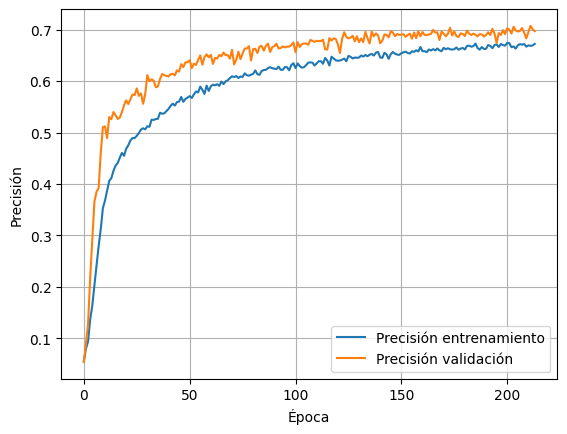

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión validación')
plt.legend()
plt.xlabel("Época")
plt.ylabel("Precisión")
plt.grid()
plt.show()


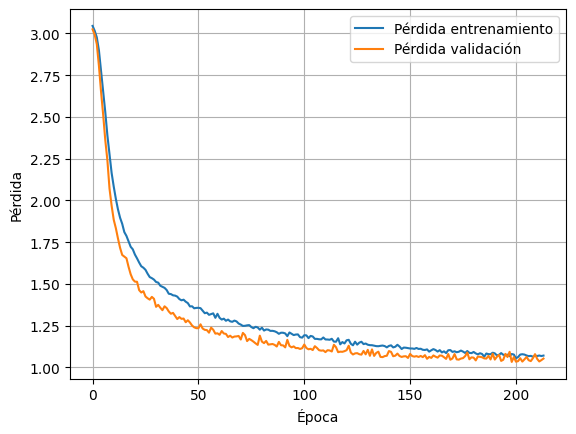

In [ ]:
plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.legend()
plt.xlabel("Época")
plt.ylabel("Pérdida")
plt.grid()
plt.show()


In [ ]:
# Revisar la mejor precisión de validación
mejor_val_accuracy = max(history.history['val_accuracy'])
print(f"Mejor precisión de validación alcanzada: {mejor_val_accuracy:.4f}")


Mejor precisión de validación alcanzada: 0.7071


In [ ]:
# model.save('modelo_manos_letras.h5')


In [ ]:
# from google.colab import files
# files.download('modelo_manos_letras.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from tensorflow.keras.models import load_model

# Cargar el mejor modelo
modelo_cargado = load_model('mejor_modelo (3).h5')


In [ ]:
# Evaluar
loss, accuracy = modelo_cargado.evaluate(X_test, y_test)

print(f"Precisión cargada: {accuracy:.4f}")
print(f"Pérdida cargada: {loss:.4f}")


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7300 - loss: 0.9929
Precisión cargada: 0.7071
Pérdida cargada: 1.0353


Found 7896 images belonging to 21 classes.
Found 1953 images belonging to 21 classes.


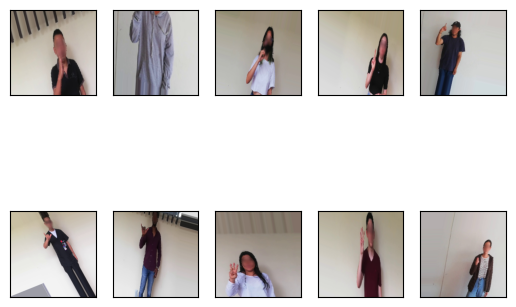

In [ ]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# import numpy as np
# import matplotlib.pyplot as plt

# datagen=ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=30,
#     width_shift_range=.25,
#     height_shift_range=.25,
#     shear_range=15,
#     zoom_range=[0.5, 1.5],
#     validation_split=0.2
# )

# data_gen_entrenamiento = datagen.flow_from_directory('/content/señas/dataset_combinado', target_size=(224,224),
#                                                      batch_size=32, shuffle = True, subset='training')
# data_gen_pruebas = datagen.flow_from_directory('/content/señas/dataset_combinado', target_size=(224,224),
#                                                      batch_size=32, shuffle = True, subset='validation')

# #Imprimer 10 imgs
# for imagen, etiqueta in data_gen_entrenamiento:
#   for i in range(10):
#     plt.subplot(2,5,i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.imshow(imagen[i])
#   break
# plt.show()

In [ ]:
# import tensorflow as tf
# import tensorflow_hub as hub

# url="https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
# mobile_net=hub.KerasLayer(url, input_shape=(224,224,3))

In [ ]:
# #Congelar el modelo descargado
# mobile_net.trainable = False

In [ ]:
# # import tensorflow as tf
# # modelo = tf.keras.Sequential([
# #     mobile_net,
# #     tf.keras.layers.Dense(21, activation='softmax')
# # ])
# import tensorflow as tf
# import tensorflow_hub as hub

# # Cargar el extractor
# url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
# hub_layer = hub.KerasLayer(url, trainable=False)

# # Construcción segura del modelo
# def build_model():
#     inputs = tf.keras.Input(shape=(224, 224, 3))

#     # Esto evita el error con KerasTensor
#     x = tf.keras.layers.Lambda(lambda x: hub_layer(x))(inputs)

#     outputs = tf.keras.layers.Dense(21, activation='softmax')(x)
#     return tf.keras.Model(inputs=inputs, outputs=outputs)

# modelo = build_model()

# # Compilar
# modelo.compile(
#     optimizer='adam',
#     loss='categorical_crossentropy',
#     metrics=['accuracy']
# )

# print("✅ Modelo creado y compilado correctamente.")


✅ Modelo creado y compilado correctamente.


In [ ]:
# modelo.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda_1 (Lambda)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 21)             │        26,901 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,901 (105.08 KB)

 Trainable params: 26,901 (105.08 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# epocas = 50

# historial = modelo.fit(
#     data_gen_entrenamiento,
#     epochs=epocas,
#     batch_size=32,
#     validation_data=data_gen_pruebas
#     )
# #

Epoch 1/50
247/247 ━━━━━━━━━━━━━━━━━━━━ 126s 473ms/step - accuracy: 0.0579 - loss: 3.2341 - val_accuracy: 0.0973 - val_loss: 3.0251
Epoch 2/50
247/247 ━━━━━━━━━━━━━━━━━━━━ 110s 447ms/step - accuracy: 0.1219 - loss: 2.9308 - val_accuracy: 0.0886 - val_loss: 3.0018
Epoch 3/50
247/247 ━━━━━━━━━━━━━━━━━━━━ 111s 449ms/step - accuracy: 0.1458 - loss: 2.8360 - val_accuracy: 0.1121 - val_loss: 2.9731
Epoch 4/50
247/247 ━━━━━━━━━━━━━━━━━━━━ 111s 450ms/step - accuracy: 0.1635 - loss: 2.7505 - val_accuracy: 0.1280 - val_loss: 2.9978
Epoch 5/50
247/247 ━━━━━━━━━━━━━━━━━━━━ 110s 447ms/step - accuracy: 0.1714 - loss: 2.7109 - val_accuracy: 0.1244 - val_loss: 3.0378
Epoch 6/50
247/247 ━━━━━━━━━━━━━━━━━━━━ 108s 438ms/step - accuracy: 0.1700 - loss: 2.7166 - val_accuracy: 0.1275 - val_loss: 3.0538
Epoch 7/50
247/247 ━━━━━━━━━━━━━━━━━━━━ 109s 442ms/step - accuracy: 0.1823 - loss: 2.6675 - val_accuracy: 0.1219 - val_loss: 3.0720
Epoch 8/50
247/247 ━━━━━━━━━━━━━━━━━━━━ 108s 436ms/step - accuracy: 0.1861 -

In [ ]:
# acc = historial.history['accuracy']
# val_acc= historial.history['val_accuracy']

# loss = historial.history['loss']
# val_loss = historial.history['val_loss']

# rango_epocas = range(50)

# plt.figure(figsize=(8,8))
# plt.subplot(1,2,1)
# plt.plot(rango_epocas, acc, label='Precisión de entrenamiento')
# plt.plot(rango_epocas, val_acc, label='Precisión de validación')
# plt.legend(loc='lower right')
# plt.title('Precisión de entrenamiento y validación')

# plt.subplot(1,2,2)
# plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
# plt.plot(rango_epocas, val_loss, label='Pérdida de validación')
# plt.legend(loc='upper right')
# plt.title('Pérdida de entrenamiento y validación')
# plt.show()
# #

In [ ]:
# import requests
# from io import BytesIO
# import cv2

# def categorizar(url):
#   respuesta = requests.get(url)
#   img = Image.open(BytesIO(respuesta.content))
#   img = np.array(imagen).astype(float)/255
#   img = cv2.resize(img, (224, 224))
#   prediccion = modelo.predict(img.reshape(-1, 224, 224, 3))
#   return np.argmax(prediccion[0], axis=-1)
